# 타이타닉 생존율 분석 해보기
## 상관분석, 상관 계수, 피어슨 상관 계수, 히트맵 
### 타이타닉 데이터 seaborn 내장 데이터 셋 
### 전처리 비슷하게, null  값을 , 최빈값(가장 빈도가 높은 데이터), 중앙값 대체 
### 파이 차트, 갯수 차트, 히트맵, 시각화 
### 1) 모든 변수 간 상관계수 구하고, 2) 지정한 두 변수 간 상관계수도 구하기. 

## 용어정리 
### 상관 분석 : 두 변수가 어떤 선형적 관계에 있는지 분석 하는 방법. 
### 두 변수의 관계의 강도를 상관관계라고 함. 
### 상관관계의 정도를 나타내는 단위를 모상관 계수 p(파이)를 사용함. by 위키피디아 

### 단순 상관 분석: 두 변수 사이의 어느 정도 강한 관계 인지. 
### 다중 상관 분석 : 세 개이상의 변수 간 관계의 강도를 측정. 

### 상관계수 : + , - , 독립변수가, 종속 변수에 어떠한 영향을 미치는지, 
### x 증가시, y도 증가하는지, 아니면 감소하는지? 
### 이번에는 수치를 구간을 나눠서, 어느정도 연관성이 있는지 수치화해서, 예측하기. 

### 피어슨 상관계수 : 많이 사용하는 예제다. 
### ex) 0.0 ~ 0.2 : 상관관계가 거의 없다. 
### ex) 0.2 ~ 0.4 : 약한 상관관계가 있다. 
### ex) 0.4 ~ 0.6 : 상관관계가 있다. 
### ex) 0.6 ~ 0.8 : 강한 상관관계가 있다. 
### ex) 0.8 ~ 1.0 : 매우 강한 상관관계가 있다. 


In [3]:
# 데이터 수집 
import seaborn as sns 
import pandas as pd 
titanic = sns.load_dataset("titanic")
titanic.to_csv("C:/BigDataTest/My_Python/1-통계분석/titanic_231219.csv", index=False)

In [4]:
# 데이터 준비 
# 비어 있는 컬럼들 조사 (결측값, 누락된값):
# age, embarked, deck , embark_town 
# 정확한 분석이 어렵기 때문에, 대체 값으로 채울 예정. 
# age -> 중앙값으로 값을 대체, embarked, deck , embark_town : 최빈값()으로 대체 하자. 
# 임의로 정했음. (룰을 임의로 정함, 데이터가 부족하거나, 표본 집단을 정하는 경우도 많음.)
# 최빈값 : 예) 카테고리  suv(70개) , 승용차(100개) , 전기차(30개) -> 승용차 최빈값.  

# titanic , 메모리 상에 있는 데이터를 기본 조사, 널 조사. 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# age, embarked, deck , embark_town 
# 정확한 분석이 어렵기 때문에, 대체 값으로 채울 예정. 
# age -> 중앙값으로 값을 대체, 
# titanic['age'].median() : 중앙값
# fillna 함수 이용해서, null 값에 , 해당 인자값 , 중앙값으로 채우기. 
# 다신, age 컬럼에 비어있는 값에, 중앙값으로 채우기. 
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# 결과 확인. 
titanic.isnull().sum()

# embarked, deck , embark_town : 최빈값()으로 대체 하자.
# embarked 컬럼의 최빈값 조사 -> S    644 , 사용
titanic["embarked"].value_counts()

# deck -> C    59 ,당첨 
titanic["deck"].value_counts()

# embark_town -> Southampton    644, 당첨
titanic["embark_town"].value_counts()

# 조사 후 , 해당 값으로 , 컬럼의 빈값에, 대체 하기. 
titanic["embarked"] = titanic["embarked"].fillna("S")
titanic["deck"] = titanic["deck"].fillna("C")
titanic["embark_town"] = titanic["embark_town"].fillna("Southampton")

# 다시, 결측값 조사. 
# 결과 확인. 
titanic.isnull().sum()



survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [10]:
# 데이터 탐색. 
# info 함수 이용해서, 기본 정보 확인. 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
# 종속 변수 survived, 생존자 수를 확인. 
# 답이 있어요. 지도 학습. 
# 사망자: 549명, 생존자: 342명. 
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

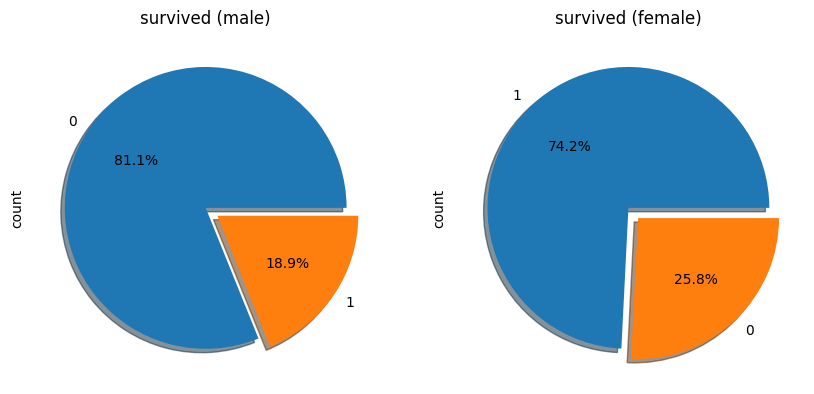

In [15]:
# 기본적인 차트 그리기, 시각화 하기. 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1,2, figsize= (10,5))

# 시각화 속성 옵션 설정하기. 
titanic['survived'][titanic["sex"] =='male'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True)

# 시각화 속성 옵션 설정하기. 
titanic['survived'][titanic["sex"] =='female'].value_counts().plot.pie(explode = [0,0.1], autopct = "%1.1f%%", ax = ax[1], shadow = True)

# 제목 
ax[0].set_title("survived (male)")
ax[1].set_title("survived (female)")

plt.show()

